<a href="https://colab.research.google.com/github/harshshaw/Machine-learning-Projects/blob/main/NannyML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Loading**

In [ ]:
!pip install nannyml
!pip install matplotlib==3.1.1
import pandas as pd
import nannyml as nml
import datetime as dt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nannyml 0.4.1 requires matplotlib<4.0.0,>=3.5.1, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
cali = fetch_california_housing(as_frame=True)
df = pd.concat([cali.data, cali.target], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# **EDA**

In [ ]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


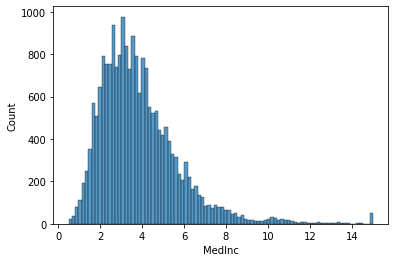

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.histplot(x='MedInc', data=df, )
plt.show()

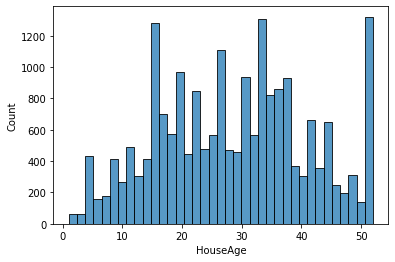

In [ ]:
sns.histplot(x="HouseAge",data=df)
plt.show()

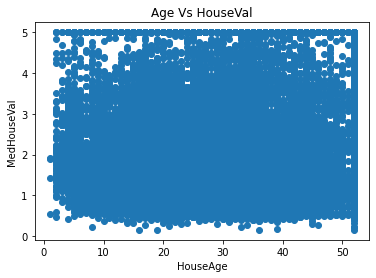

In [ ]:
plt.scatter( x="HouseAge", y='MedHouseVal', data=df, )
plt.title("Age Vs HouseVal")
plt.xlabel("HouseAge")
plt.ylabel("MedHouseVal")
plt.show()

# **Pipeline Creation**

In [ ]:
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:

class Pipeline:
  def __init__(self,target,meta,features):
    self.target = target
    self.meta = meta
    self.features = features
    print("Initialised Values are Target:{}, Meta:{}, Features:{}".format(self.target,self.meta,self.features))
  
  def transform(self,df):
    df=self.timestamp(df)
    df=self.targetCreation(df)
    print("Transformed")
    return df
    
  def fit(self,df_train,y=None):
    clf=RandomForestClassifier(max_depth=10,random_state=2)
    clf.fit(df_train[self.features],df_train[self.target])
    return clf

  def predict(self,df,clf):
    df['y_pred_proba']=clf.predict_proba(df[self.features])[:,1]
    df['y_pred']=df['y_pred_proba'].map(lambda p:int(p>=0.8))
    for partition_name, partition_data in df.groupby('partition', sort=False):
      print(partition_name, roc_auc_score(partition_data[self.target], partition_data['y_pred_proba']))
    return df

  def timestamp(self,df):
    timestamps = [dt.datetime(2020,1,1) + dt.timedelta(hours=x/2) for x in df.index]
    df['timestamp'] = timestamps
    train_beg = dt.datetime(2020,1,1)
    train_end = dt.datetime(2020,8,1)
    df.loc[df['timestamp'].between(train_beg, train_end, inclusive='left'), 'partition'] = 'model development'
    df['partition'] = df['partition'].fillna('production')
    print("TimeStamp Created!")
    return df
    
  def targetCreation(self,df):
    df_train = df[df['partition']=='model development']
    df['clf_target'] = np.where(df['MedHouseVal'] > df_train['MedHouseVal'].median(), 1, 0)
    df = df.drop('MedHouseVal', axis=1)
    del df_train
    print("Target column made!")
    return df
    


In [ ]:
target = 'clf_target'
meta = 'partition'
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Pl=Pipeline(target,meta,features)

Initialised Values are Target:clf_target, Meta:partition, Features:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
df=Pl.transform(df)
#Creating different Dataset for Production and Model development
df_production=df[df['partition']=='production']
df_production.head()
df.head()

TimeStamp Created!
Target column made!
Transformed


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,timestamp,partition,clf_target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2020-01-01 00:00:00,model development,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2020-01-01 00:30:00,model development,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2020-01-01 01:00:00,model development,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2020-01-01 01:30:00,model development,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,2020-01-01 02:00:00,model development,1


In [ ]:
df_train = df[df['partition']=='model development']
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10224 entries, 0 to 10223
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MedInc      10224 non-null  float64       
 1   HouseAge    10224 non-null  float64       
 2   AveRooms    10224 non-null  float64       
 3   AveBedrms   10224 non-null  float64       
 4   Population  10224 non-null  float64       
 5   AveOccup    10224 non-null  float64       
 6   Latitude    10224 non-null  float64       
 7   Longitude   10224 non-null  float64       
 8   timestamp   10224 non-null  datetime64[ns]
 9   partition   10224 non-null  object        
 10  clf_target  10224 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 958.5+ KB


In [ ]:
clf=Pl.fit(df_train)
df=Pl.predict(df_train,clf)
df.tail()

model development 0.9908504492865983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,timestamp,partition,clf_target,y_pred_proba,y_pred
10219,4.5000,16.0,5.183784,0.951351,353.0,1.908108,33.89,-117.88,2020-07-31 21:30:00,model development,0,0.469527,0
10220,3.0263,15.0,2.586486,0.972973,615.0,1.662162,33.88,-117.88,2020-07-31 22:00:00,model development,0,0.401021,0
10221,1.9127,15.0,2.843643,1.075601,1549.0,2.661512,33.88,-117.89,2020-07-31 22:30:00,model development,0,0.282885,0
10222,5.3836,33.0,6.591667,1.066667,771.0,3.212500,33.88,-117.89,2020-07-31 23:00:00,model development,1,0.951751,1
10223,5.7519,27.0,6.298193,1.012048,1037.0,3.123494,33.88,-117.89,2020-07-31 23:30:00,model development,1,0.972330,1


In [ ]:
clf=Pl.fit(df_production)
df_production=Pl.predict(df_production,clf)
df_production.head()

production 0.9902756447334304


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,timestamp,partition,clf_target,y_pred_proba,y_pred
10224,3.0893,25.0,3.835476,1.128535,755.0,1.940874,33.87,-117.89,2020-08-01 00:00:00,production,1,0.647017,0
10225,3.3594,32.0,4.969298,0.947368,693.0,3.039474,33.87,-117.89,2020-08-01 00:30:00,production,1,0.608914,0
10226,5.6409,35.0,5.562319,1.011594,1302.0,3.773913,33.87,-117.88,2020-08-01 01:00:00,production,1,0.964730,1
10227,3.0465,32.0,4.064767,1.093264,835.0,2.163212,33.87,-117.89,2020-08-01 01:30:00,production,0,0.569980,0
10228,3.3472,45.0,4.244726,0.970464,1237.0,5.219409,33.87,-117.93,2020-08-01 02:00:00,production,0,0.246093,0


# **Preparing For Nannyml Data format**

In [ ]:
df_for_nanny = df_production.reset_index(drop=True)
df_for_nanny['partition'] = df_for_nanny['partition'].map({'production':'analysis'})
df_for_nanny['identifier'] = df_for_nanny.index



reference = df.copy()
analysis = df_for_nanny[df_for_nanny['partition']=='analysis'].copy()
analysis_targets = analysis[['identifier', 'clf_target']].copy()
analysis = analysis.drop('clf_target', axis=1)
analysis_targets.head()


,identifier,clf_target
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0


In [ ]:
reference, analysis, analysis_targets = nml.datasets.load_modified_california_housing_dataset()
# reference=df
reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        5832 non-null   float64
 1   HouseAge      5832 non-null   float64
 2   AveRooms      5832 non-null   float64
 3   AveBedrms     5832 non-null   float64
 4   Population    5832 non-null   float64
 5   AveOccup      5832 non-null   float64
 6   Latitude      5832 non-null   float64
 7   Longitude     5832 non-null   float64
 8   timestamp     5832 non-null   object 
 9   partition     5832 non-null   object 
 10  clf_target    5832 non-null   int64  
 11  y_pred_proba  5832 non-null   float64
 12  y_pred        5832 non-null   int64  
 13  identifier    5832 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 638.0+ KB


In [ ]:
metadata = nml.extract_metadata(reference, exclude_columns=['identifier'],  model_type='classification_binary') 

metadata.target_column_name = 'clf_target'
metadata.timestamp_column_name = 'timestamp'
print(metadata)

Metadata({'timestamp_column_name': 'timestamp', 'partition_column_name': 'partition', 'target_column_name': 'clf_target', 'features': [{'label': 'MedInc', 'column_name': 'MedInc', 'type': 'continuous', 'description': 'extracted feature: MedInc'}, {'label': 'HouseAge', 'column_name': 'HouseAge', 'type': 'continuous', 'description': 'extracted feature: HouseAge'}, {'label': 'AveRooms', 'column_name': 'AveRooms', 'type': 'continuous', 'description': 'extracted feature: AveRooms'}, {'label': 'AveBedrms', 'column_name': 'AveBedrms', 'type': 'continuous', 'description': 'extracted feature: AveBedrms'}, {'label': 'Population', 'column_name': 'Population', 'type': 'continuous', 'description': 'extracted feature: Population'}, {'label': 'AveOccup', 'column_name': 'AveOccup', 'type': 'continuous', 'description': 'extracted feature: AveOccup'}, {'label': 'Latitude', 'column_name': 'Latitude', 'type': 'continuous', 'description': 'extracted feature: Latitude'}, {'label': 'Longitude', 'column_name'

# **Analysis**

In [ ]:
#calling CBPE class and making object of it to calcuate and Visualize the Performance of the Dataset
cbpe = nml.CBPE(model_metadata=metadata, chunk_period='M', metrics=['roc_auc'])
cbpe.fit(reference_data=reference)
est_perf = cbpe.estimate(pd.concat([reference, analysis]))

/usr/local/lib/python3.7/dist-packages/nannyml/chunk.py:191: UserWarning:

The resulting list of chunks contains 1 underpopulated chunks. They contain too few records to be statistically robust and might negatively influence the quality of calculations. Please consider splitting your data in a different way or continue at your own risk.



In [ ]:
# For analysis the dataset is divide into 12 data chunks using month as the mode of division
est_perf.data['end_index'] - est_perf.data['start_index']

0     743
1     719
2     743
3     743
4     671
5     743
6     719
7     743
8     719
9     743
10    743
11    719
12    743
13    719
14    743
15    743
16    671
17    743
18    719
19    215
dtype: int64

In [ ]:
est_perf.data = est_perf.data[:-1].copy()
est_perf.data.head()

,key,start_index,end_index,start_date,end_date,partition,confidence_roc_auc,realized_roc_auc,estimated_roc_auc,upper_threshold_roc_auc,lower_threshold_roc_auc,alert_roc_auc
0,2020-10,0,743,2020-10-01,2020-10-31 23:59:59.999999999,reference,0.051046,0.911168,0.927251,0.708336,1.0,False
1,2020-11,744,1463,2020-11-01,2020-11-30 23:59:59.999999999,reference,0.051046,0.902495,0.907599,0.708336,1.0,False
2,2020-12,1464,2207,2020-12-01,2020-12-31 23:59:59.999999999,reference,0.051046,0.926407,0.909652,0.708336,1.0,False
3,2021-01,2208,2951,2021-01-01,2021-01-31 23:59:59.999999999,reference,0.051046,0.964630,0.946637,0.708336,1.0,False
4,2021-02,2952,3623,2021-02-01,2021-02-28 23:59:59.999999999,reference,0.051046,0.895302,0.881036,0.708336,1.0,False


**We can see below the performance has degraded for the October 2021 period, later the perfomance of the model continue to be steady for rest of the analysis period**

In [ ]:
fig = est_perf.plot(kind='performance', metric='roc_auc')
fig.show()

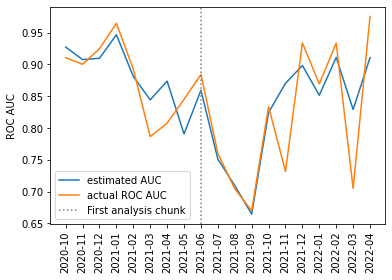

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# add ground truth to analysis
analysis_full = pd.merge(analysis,analysis_targets, on = 'identifier')
df_all = pd.concat([reference, analysis_full]).reset_index(drop=True)
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
# calculate actual ROC AUC
target_col = metadata.target_column_name
pred_score_col = 'y_pred_proba'
actual_performance = []
for idx in est_perf.data.index:
    start_date, end_date = est_perf.data.loc[idx, 'start_date'], est_perf.data.loc[idx, 'end_date']
    sub = df_all[df_all['timestamp'].between(start_date, end_date)]
    actual_perf = roc_auc_score(sub[target_col], sub[pred_score_col])
    est_perf.data.loc[idx, 'actual_roc_auc'] = actual_perf
# plot
first_analysis = est_perf.data[est_perf.data['partition']=='analysis']['key'].values[0]
plt.plot(est_perf.data['key'], est_perf.data['estimated_roc_auc'], label='estimated AUC')
plt.plot(est_perf.data['key'], est_perf.data['actual_roc_auc'], label='actual ROC AUC')
plt.xticks(rotation=90)
plt.axvline(x=first_analysis, label='First analysis chunk', linestyle=':', color='grey')
plt.ylabel('ROC AUC')
plt.legend()
plt.show()

**From above curve we can see that the estimated AUC vs actual ROC AUC remains similar until 03-2021 where there is drop in performance and again goes similar until 2021-12 and 2022-03 where there are again a drop in performance.**

# **Data Drift**

> # **Below we could find that there are alerts for every features**
**HouseAge having the maximum with 12 alerts for all 12 chunks,**
**Population having the least with 8 alerts out of 12 chunks**
## **Conclusion: Production Dataset has Drift with HouseAge,AveOccup etc having maximum and Avebdrms and Population having least**







In [ ]:
univariate_calculator = nml.UnivariateStatisticalDriftCalculator(model_metadata=metadata, chunk_period='M').fit(reference_data=reference)
univariate_results = univariate_calculator.calculate(data=analysis)
nml.Ranker.by('alert_count').rank(univariate_results, metadata)



/usr/local/lib/python3.7/dist-packages/nannyml/chunk.py:191: UserWarning:

The resulting list of chunks contains 1 underpopulated chunks. They contain too few records to be statistically robust and might negatively influence the quality of calculations. Please consider splitting your data in a different way or continue at your own risk.



,feature,number_of_alerts,rank
0,HouseAge,12,1
1,AveOccup,12,2
2,Latitude,12,3
3,Longitude,12,4
4,MedInc,11,5
5,AveRooms,11,6
6,AveBedrms,8,7
7,Population,8,8


**Above we can see the maximum numbers of alert that is generated for features 
also With rank we can see HouseAge, AveOccup, Latitude,Longitude has maximum alerts 
AveBedrms and Population have least**

> **From the  Graphs we can see there have been a lot of data drift in each of the features mostly for the whole analysis period**




In [ ]:
for feature in metadata.features:
    figure = univariate_results.plot(kind='feature_drift', metric='statistic', feature_label=feature.label)
    figure.show()

In [ ]:

d_stat_cols = [x for x in univariate_results.data if 'dstat' in x]
univariate_results.data[d_stat_cols].mean().sort_values(ascending=False)

Longitude_dstat       0.836534
Latitude_dstat        0.799592
y_pred_proba_dstat    0.327289
HouseAge_dstat        0.173479
MedInc_dstat          0.158278
AveOccup_dstat        0.133803
AveRooms_dstat        0.110907
AveBedrms_dstat       0.078666
Population_dstat      0.071312
dtype: float64

In [ ]:
for label in ['Longitude', 'Latitude']:
    fig = univariate_results.plot(
        kind='feature_distribution',
        feature_label=label)
    fig.show()

Text(0, 0.5, 'Longitude')

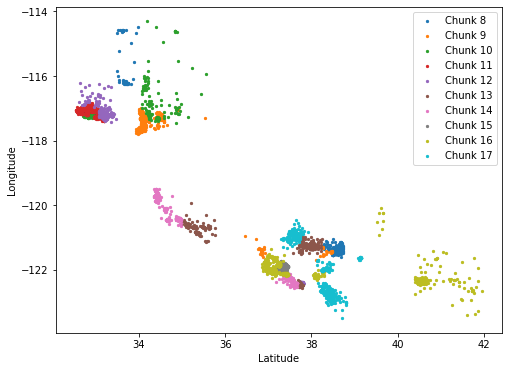

In [ ]:
analysis_res = est_perf.data[est_perf.data['partition']=='analysis']
plt.figure(figsize=(8,6))
for idx in analysis_res.index[:10]:
    start_date, end_date = analysis_res.loc[idx, 'start_date'], analysis_res.loc[idx, 'end_date']
    sub = df_all[df_all['timestamp'].between(start_date, end_date)]
    plt.scatter(sub['Latitude'], sub['Longitude'], s=5, label="Chunk {}".format(str(idx)))
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

#**Conclusion**

> Analysis was Done on California Housing Dataset.Dataset was Divided into Model-development and Production,Where the Accuracy on Model development was found out to be 99%, later dataset was transformed into Nannyml Data Format and analysis on the dataset was done.

> **Has the data drifted?**
Answer: Yes the data for the Analysis period had a lot of drift when compared to the data used in model development some features such as HouseAge, AveOccup had drift for the entire period of analysis.



> **Is the model still performing well?**
Answer: Even though there was a drift or degrade in October 2021 but the model performed well for rest of analysis period with good ROC-AUC curve value.

> **Was there any training-serving skew?**
Answer:No there wasn't any training-serving skew as both "model development" and "Production" accuracy were similar 99%, this can be due to the fact that the degradeed performance was for Ocotber 2021 and the rest of the period model performed well.



> **Is the data drift impacting the performance of the model?**
Answer1:On Analysing we found the Performance of the Dataset to be stable until October 2021, that the point where a drift and degrade in the performance of dataset was found but i continued to perform well for rest of the period with high ROC-AUC score.

> **What might be the cause of the issues (if there are any issues)?**
Answer:On Analysing all the features of the Dataset we found except for the MedInc feature all the other features had a large drift in the month of october 2021 where the performance of the model was degraded and drift was detected.

> **(Bonus question) Is there any concept drift?**
Answer: Probably there are no concept drif, since the performance of the model was on an average Good.








